In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix

In [2]:
acc_scorer = make_scorer(accuracy_score)

In [3]:
titanic = pd.read_csv('titanic.csv', sep=';')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON


In [4]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
titanic.dropna(subset=['age'], inplace=True)
titanic.age = titanic.age.astype(int)
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000,120.00000
mean,2.207457,0.408222,29.857553,0.502868,0.42065,36.686080,160.87500
std,0.841497,0.491740,14.426974,0.912167,0.83975,55.732533,98.10392
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000
25%,1.000000,0.000000,21.000000,0.000000,0.00000,8.050000,71.50000
50%,2.000000,0.000000,28.000000,0.000000,0.00000,15.750000,155.50000
75%,3.000000,1.000000,39.000000,1.000000,1.00000,35.500000,256.50000
max,3.000000,1.000000,80.000000,8.000000,6.00000,512.329200,328.00000


In [6]:
titanic.sex = titanic.sex.map({'male' : 0, 'female' : 1})
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,1,29,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,0,0,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,1,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,0,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),1,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON


In [7]:
titanic['cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1301        NaN
1304        NaN
1306        NaN
1307        NaN
1308        NaN
Name: cabin, Length: 1046, dtype: object>

In [8]:
titanic.drop(columns=['name', 'ticket', 'cabin', 'home.dest', 'body'], inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,1,29,0,0,211.3375,S,2
1,1,1,0,0,1,2,151.5500,S,11
2,1,0,1,2,1,2,151.5500,S,NaN
3,1,0,0,30,1,2,151.5500,S,NaN
4,1,0,1,25,1,2,151.5500,S,NaN


In [9]:
titanic.describe()

,pclass,survived,sex,age,sibsp,parch,fare
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000
mean,2.207457,0.408222,0.370937,29.857553,0.502868,0.42065,36.686080
std,0.841497,0.491740,0.483287,14.426974,0.912167,0.83975,55.732533
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,0.000000,0.00000,8.050000
50%,2.000000,0.000000,0.000000,28.000000,0.000000,0.00000,15.750000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,1.00000,35.500000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.00000,512.329200


In [10]:
titanic.dropna(subset=['fare'], inplace=True)
titanic.describe()

,pclass,survived,sex,age,sibsp,parch,fare
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,2.206699,0.408612,0.371292,29.828708,0.503349,0.421053,36.686080
std,0.841542,0.491813,0.483382,14.403675,0.912471,0.840052,55.732533
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,0.000000,0.000000,28.000000,0.000000,0.000000,15.750000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,1.000000,35.500000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
import matplotlib.pyplot as plt
table = pd.crosstab(titanic.age, titanic.survived)
table

survived,0,1
age,,
0,2,10
1,3,7
2,8,4
3,2,5
4,3,7
...,...,...
70,3,0
71,2,0
74,1,0


<Axes: xlabel='age'>

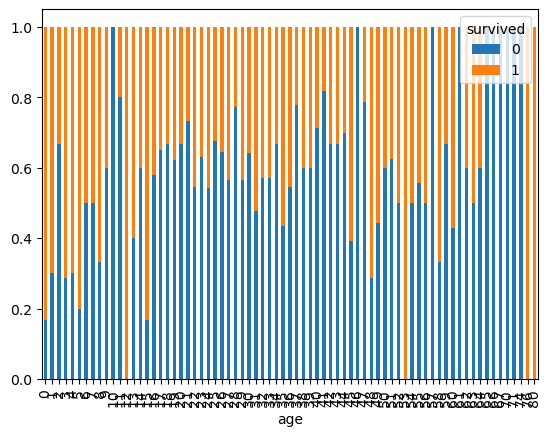

In [12]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [13]:
titanic['age_seg'] = pd.cut(titanic['age'], 5)
titanic.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,age_seg
0,1,1,1,29,0,0,211.3375,S,2,"(16.0, 32.0]"
1,1,1,0,0,1,2,151.5500,S,11,"(-0.08, 16.0]"
2,1,0,1,2,1,2,151.5500,S,NaN,"(-0.08, 16.0]"
3,1,0,0,30,1,2,151.5500,S,NaN,"(16.0, 32.0]"
4,1,0,1,25,1,2,151.5500,S,NaN,"(16.0, 32.0]"


In [14]:
titanic['age_seg'].value_counts

<bound method IndexOpsMixin.value_counts of 0        (16.0, 32.0]
1       (-0.08, 16.0]
2       (-0.08, 16.0]
3        (16.0, 32.0]
4        (16.0, 32.0]
            ...      
1301     (32.0, 48.0]
1304    (-0.08, 16.0]
1306     (16.0, 32.0]
1307     (16.0, 32.0]
1308     (16.0, 32.0]
Name: age_seg, Length: 1045, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]>

In [15]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,age_seg
0,1,1,1,29,0,0,211.3375,S,2,"(16.0, 32.0]"
1,1,1,0,0,1,2,151.5500,S,11,"(-0.08, 16.0]"
2,1,0,1,2,1,2,151.5500,S,NaN,"(-0.08, 16.0]"
3,1,0,0,30,1,2,151.5500,S,NaN,"(16.0, 32.0]"
4,1,0,1,25,1,2,151.5500,S,NaN,"(16.0, 32.0]"


In [16]:
titanic.loc[titanic['age'] <= 16, 'age'] = 0
titanic.loc[(titanic['age'] > 16) & (titanic['age'] <= 32), 'age'] = 1
titanic.loc[(titanic['age'] > 32) & (titanic['age'] <= 48), 'age'] = 2
titanic.loc[(titanic['age'] > 48) & (titanic['age'] <= 64), 'age'] = 3
titanic.loc[titanic['age'] > 64, 'age'] = 4
titanic.drop(columns=['age_seg', 'boat'], inplace=True)

In [17]:
titanic.head(25)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,1,0,0,211.3375,S
1,1,1,0,0,1,2,151.5500,S
2,1,0,1,0,1,2,151.5500,S
3,1,0,0,1,1,2,151.5500,S
4,1,0,1,1,1,2,151.5500,S
5,1,1,0,2,0,0,26.5500,S
6,1,1,1,3,1,0,77.9583,S
7,1,0,0,2,0,0,0.0000,S
8,1,1,1,3,2,0,51.4792,S
9,1,0,0,4,0,0,49.5042,C


In [18]:
table = pd.crosstab(titanic.age, titanic.survived)
table


survived,0,1
age,,
0,60,74
1,330,198
2,159,106
3,58,47
4,11,2


Text(0, 0.5, 'survie')

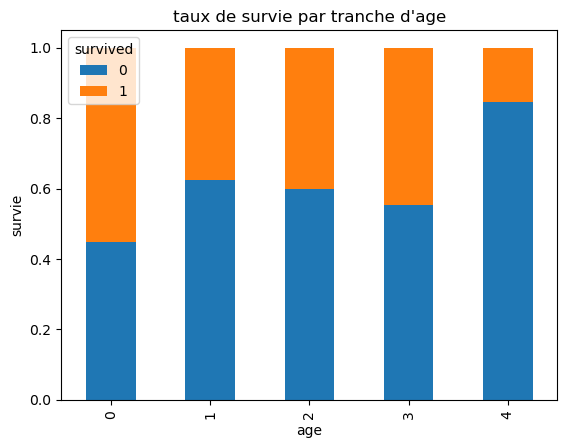

In [19]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('taux de survie par tranche d\'age')
plt.xlabel('age')
plt.ylabel('survie')


In [20]:
table = pd.crosstab(titanic['sex'], titanic['survived'])
table

survived,0,1
sex,,
0,522,135
1,96,292


Text(0, 0.5, 'survie')

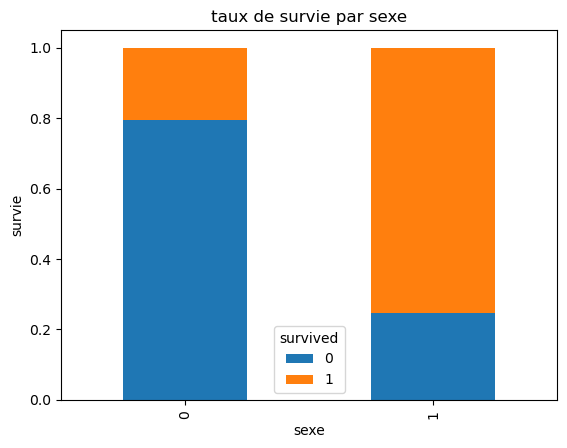

In [21]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('taux de survie par sexe')
plt.xlabel('sexe')
plt.ylabel('survie')

Text(0.5, 1.0, 'Taux de survie en fonction de la classe')

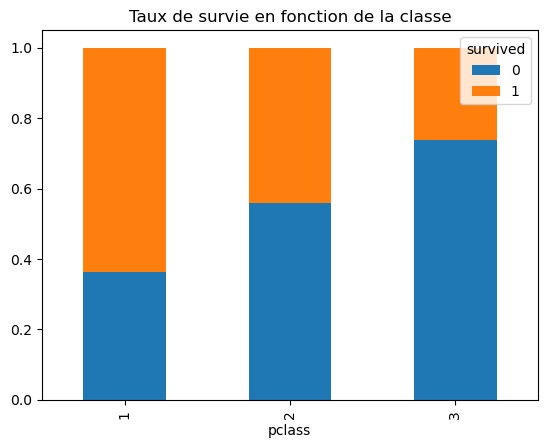

In [22]:
table = pd.crosstab(titanic['pclass'], titanic['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Taux de survie en fonction de la classe')

In [23]:
titanic['fare_seg'] = pd.qcut(titanic['fare'], 3)
titanic.fare_seg.value_counts

<bound method IndexOpsMixin.value_counts of 0       (27.0, 512.329]
1       (27.0, 512.329]
2       (27.0, 512.329]
3       (27.0, 512.329]
4       (27.0, 512.329]
             ...       
1301     (-0.001, 10.5]
1304       (10.5, 27.0]
1306     (-0.001, 10.5]
1307     (-0.001, 10.5]
1308     (-0.001, 10.5]
Name: fare_seg, Length: 1045, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 10.5] < (10.5, 27.0] < (27.0, 512.329]]>

In [24]:
titanic.loc[titanic['fare'] <= 10.5, 'fare'] = 0
titanic.loc[(titanic['fare'] > 10.5) & (titanic['fare'] <= 27), 'fare'] = 1
titanic.loc[titanic['fare'] > 27, 'fare'] = 2
titanic.drop(columns=['fare_seg'], inplace=True)

In [25]:
titanic.head(20)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,1,0,0,2.0,S
1,1,1,0,0,1,2,2.0,S
2,1,0,1,0,1,2,2.0,S
3,1,0,0,1,1,2,2.0,S
4,1,0,1,1,1,2,2.0,S
5,1,1,0,2,0,0,1.0,S
6,1,1,1,3,1,0,2.0,S
7,1,0,0,2,0,0,0.0,S
8,1,1,1,3,2,0,2.0,S
9,1,0,0,4,0,0,2.0,C


Text(0.5, 1.0, 'Taux de survie en fonction du prix du ticket')

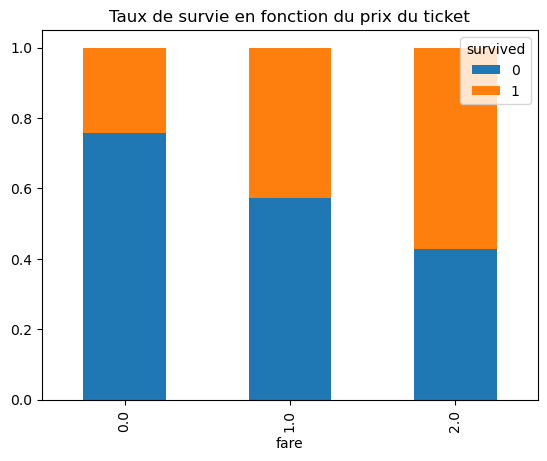

In [26]:
table = pd.crosstab(titanic['fare'], titanic['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Taux de survie en fonction du prix du ticket')

Text(0.5, 1.0, "Taux de survie en fonction du port d'embarquement")

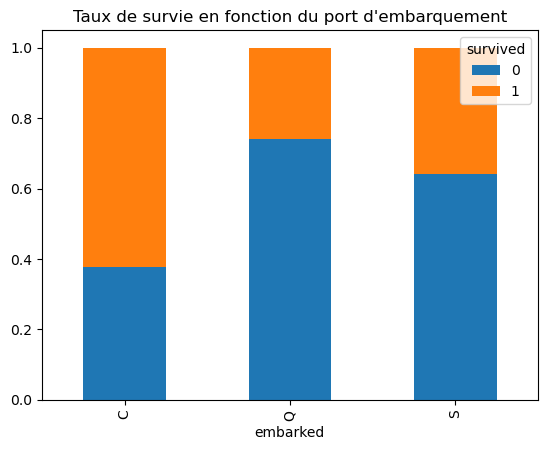

In [27]:
table = pd.crosstab(titanic['embarked'], titanic['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Taux de survie en fonction du port d\'embarquement')

Text(0.5, 1.0, 'Taux de survie en fonction du nbr de membres de famille')

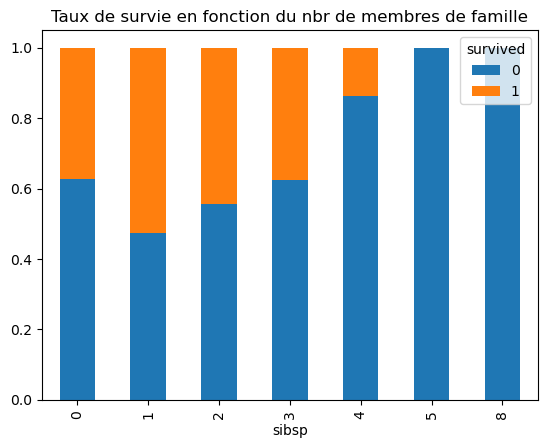

In [28]:
table = pd.crosstab(titanic['sibsp'], titanic['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Taux de survie en fonction du nbr de membres de famille')

Text(0.5, 1.0, 'Taux de survie en fonction du nbr de conjoint et enfants')

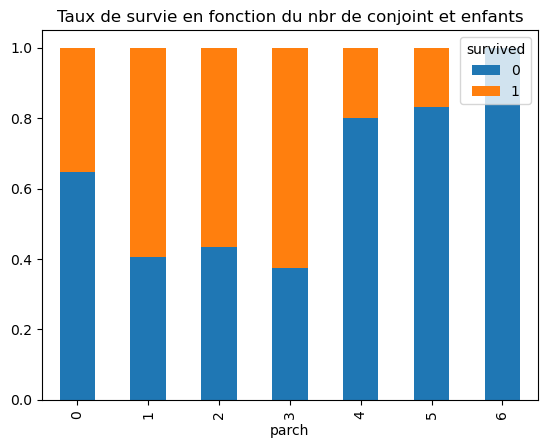

In [29]:
table = pd.crosstab(titanic['parch'], titanic['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Taux de survie en fonction du nbr de conjoint et enfants')

In [30]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

Text(0.5, 1.0, 'Taux de survie en fonction du nbr total membres famille')

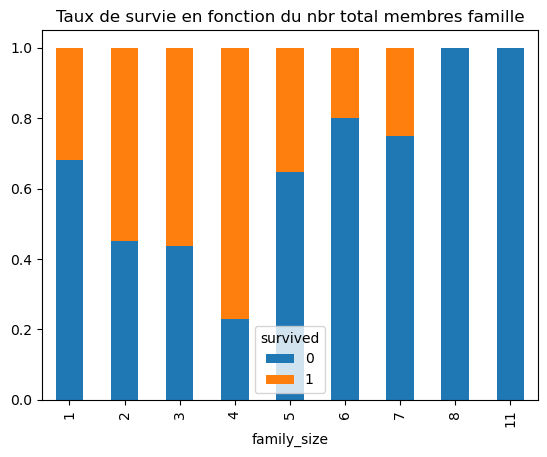

In [31]:
table = pd.crosstab(titanic['family_size'], titanic['survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Taux de survie en fonction du nbr total membres famille')

In [32]:
titanic.drop(columns=['sibsp', 'parch'], inplace=True)

In [33]:
titanic.head()

,pclass,survived,sex,age,fare,embarked,family_size
0,1,1,1,1,2.0,S,1
1,1,1,0,0,2.0,S,4
2,1,0,1,0,2.0,S,4
3,1,0,0,1,2.0,S,4
4,1,0,1,1,2.0,S,4


In [34]:
x = titanic.drop(columns='survived')
y = titanic['survived']


In [35]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [36]:
x.head()

,pclass,sex,age,fare,embarked,family_size
0,1,1,1,2.0,S,1
1,1,0,0,2.0,S,4
2,1,1,0,2.0,S,4
3,1,0,1,2.0,S,4
4,1,1,1,2.0,S,4


In [37]:
x.drop(columns='embarked', inplace=True)
x.head()

,pclass,sex,age,fare,family_size
0,1,1,1,2.0,1
1,1,0,0,2.0,4
2,1,1,0,2.0,4
3,1,0,1,2.0,4
4,1,1,1,2.0,4


In [38]:
x.drop(columns='pclass', inplace=True)
x.head()

,sex,age,fare,family_size
0,1,1,2.0,1
1,0,0,2.0,4
2,1,0,2.0,4
3,0,1,2.0,4
4,1,1,2.0,4


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [40]:
random_forest = RandomForestClassifier()

parameters = {'n_estimators' : [3, 4, 5, 10, 12, 15, 20, 25], 'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 3, 5, 10]}

grid = GridSearchCV(random_forest, parameters, scoring=acc_scorer, cv=3)

grid = grid.fit(x_train, y_train)
modele = grid.best_estimator_
print(modele)


RandomForestClassifier(max_depth=5, n_estimators=4)


In [41]:
from sklearn.metrics import classification_report

modele.fit(x_train, y_train)
y_pred = modele.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       175
           1       0.74      0.68      0.71       139

    accuracy                           0.75       314
   macro avg       0.75      0.74      0.75       314
weighted avg       0.75      0.75      0.75       314

